In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
0,236670,Wired Headphones,2,11.99,23.98,08/31/19,22,31,8,2019,Sat,359 Spruce St,Seattle,WA,98101,PM
1,236671,Bose SoundSport Headphones,1,99.99,99.99,08/15/19,15,15,8,2019,Thu,492 Ridge St,Dallas,TX,75001,PM
2,236672,iPhone,1,700.00,700.00,08/06/19,14,6,8,2019,Tue,149 7th St,Portland,OR,97035,PM
3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19,20,29,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
4,236674,AA Batteries (4-pack),2,3.84,7.68,08/15/19,19,15,8,2019,Thu,736 14th St,New York City,NY,10001,PM


In [4]:
df.shape

(185950, 16)

In [5]:
df=df.drop(["order_id","pincode"],axis=1) #As Order Id  is nothing but a unique id given to each product.Also pincode is the unique code for each city which may be of no use

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   product    185950 non-null  object 
 1   quantity   185950 non-null  int64  
 2   price      185950 non-null  float64
 3   total      185950 non-null  float64
 4   full_date  185950 non-null  object 
 5   hour       185950 non-null  int64  
 6   date       185950 non-null  int64  
 7   month      185950 non-null  int64  
 8   year       185950 non-null  int64  
 9   day        185950 non-null  object 
 10  address    185950 non-null  object 
 11  city       185950 non-null  object 
 12  state      185950 non-null  object 
 13  timezone   185950 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 19.9+ MB


In [7]:
df.describe()

,quantity,price,total,hour,date,month,year
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917,14.413305,15.759532,7.059140,2019.000183
std,0.442793,332.731330,332.919771,5.423416,8.782176,3.502996,0.013521
min,1.000000,2.990000,2.990000,0.000000,1.000000,1.000000,2019.000000
25%,1.000000,11.950000,11.950000,11.000000,8.000000,4.000000,2019.000000
50%,1.000000,14.950000,14.950000,15.000000,16.000000,7.000000,2019.000000
75%,1.000000,150.000000,150.000000,19.000000,23.000000,10.000000,2019.000000
max,9.000000,1700.000000,3400.000000,23.000000,31.000000,12.000000,2020.000000


# Q1. What is the 4th highest product sold in terms of total revenue generated overall ?

In [32]:
df.groupby("product")["total"].sum().sort_values(ascending=False)[3:4]

product
Google Phone    3319200.0
Name: total, dtype: float64

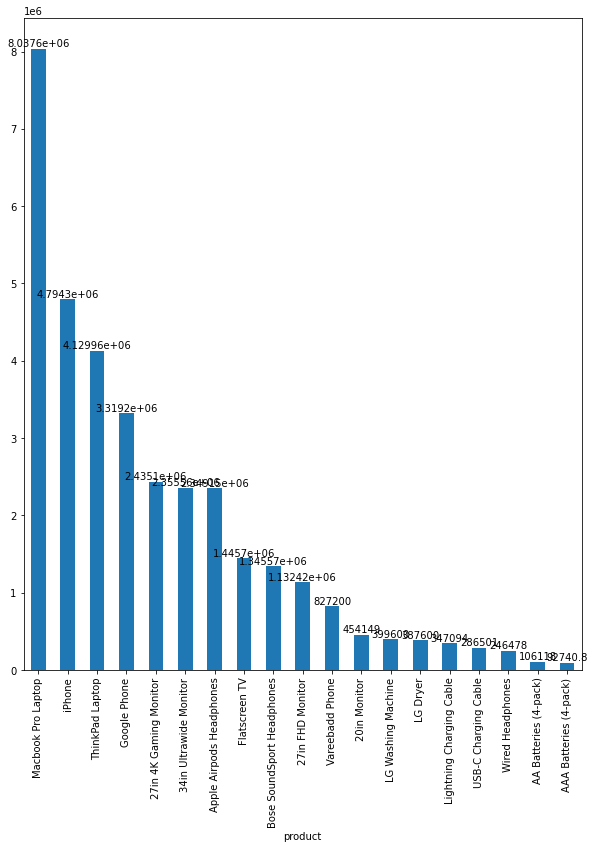

In [9]:
plt.figure(figsize=(10,12))
ax=df.groupby("product")["total"].sum().sort_values(ascending=False).plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

# Q2. Which City sees the maximum number of orders being placed in the month of June 2019?


In [10]:
df.loc[(df.month==6)&(df.year==2019),"city"].value_counts().head(1)

San Francisco    3303
Name: city, dtype: int64

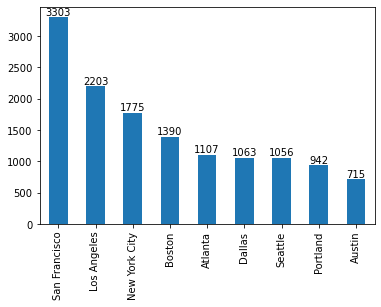

In [11]:
ax=df.loc[(df.month==6)&(df.year==2019),"city"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

# Q3. What is the least popular product in terms of unique orders in the city of Los Angeles. ?


In [12]:
df.loc[df.city=="Los Angeles","product"].value_counts().tail(1)

LG Washing Machine    105
Name: product, dtype: int64

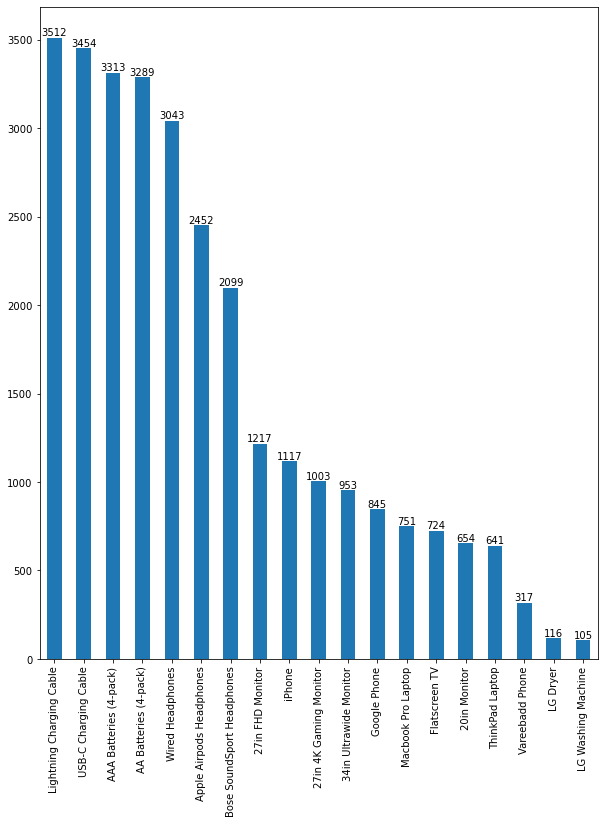

In [13]:
plt.figure(figsize=(10,12))
ax=df.loc[df.city=="Los Angeles","product"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

# Q4. Which state has the highest revenue generated from all the apple products in year 2019?


In [14]:
Apple_products=["Apple Airpods Headphones","iPhone","Macbook Pro Laptop"]
for i in Apple_products:
    dtf=df.loc[(df["product"]==i)&(df.year==2019),["total","state","price"]]
dtf.groupby("state")["total"].sum().sort_values(ascending=False)

state
CA    3207900.0
NY    1116900.0
TX    1074400.0
MA     814300.0
GA     644300.0
WA     605200.0
OR     465800.0
ME     107100.0
Name: total, dtype: float64

<AxesSubplot:xlabel='state'>

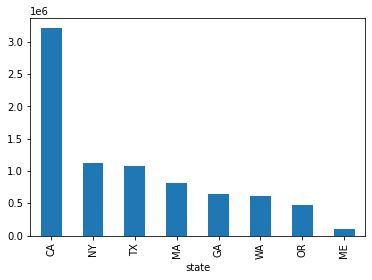

In [15]:
dtf.groupby("state")["total"].sum().sort_values(ascending=False).plot.bar()

# Q5.What is the difference of revenue generated between weekend and weekday in the state of CA ?

In [16]:
weekday=["Mon","Tue","Wed","Thu"]
weekends=["Fri","Sat","Sun"]
for i in weekday:
    ddf_wkd=df.loc[df.day==i,["total","state"]]
for j in weekends:
    ddf_wknd=df.loc[df.day==j,["total","state"]]
wk_rv=ddf_wkd.loc[df.state=="CA","total"].sum().round(2)
wknd_rv=ddf_wknd.loc[df.state=="CA","total"].sum().round(2)
if(wk_rv>wknd_rv):
    total_rv=wk_rv-wknd_rv
else:
     total_rv=wknd_rv-wk_rv
        
print("The differnce of total revenue generated is:",total_rv.round(2))

The differnce of total revenue generated is: 32768.48


# Q6. Which city has seen the overall least orders in night hours in the months of May, June and July 2019. 


In [17]:
ddf=df.loc[((df.hour>=18)&(df.hour<=24))&(df.year==2019),["city","month","total","year"]]
ddf.loc[(df.month>=5)&(df.month<=7),["city"]].value_counts().tail(1)

city  
Austin    743
dtype: int64

<AxesSubplot:xlabel='city'>

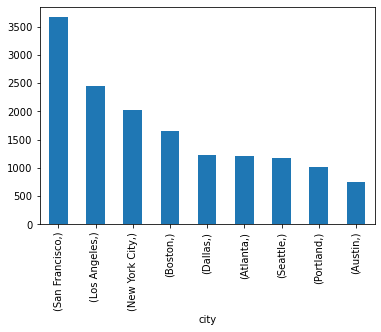

In [18]:
ddf.loc[(df.month>=5)&(df.month<=7),["city"]].value_counts().plot.bar()

# Q7. Is “Google Phone” better performing in respect to overall number of orders placed as well as revenue generated than “iphone” in “New York City” ?


In [19]:
df_iphone=df.loc[(df["product"]=="iPhone")&(df.city=="New York City"),["city","product","total"]].agg({"total":"sum"}).values
df_gphone=df.loc[(df["product"]=="Google Phone")&(df.city=="New York City"),["city","product","total"]].agg({"total":"sum"}).values
df_iphone_order=df.loc[(df["product"]=="iPhone")&(df.city=="New York City"),["city","product","total"]].value_counts().values
df_gphone_order=df.loc[(df["product"]=="Google Phone")&(df.city=="New York City"),["city","product","total"]].value_counts().values

In [20]:
tt_rev=((int(df_iphone)-int(df_gphone))*100)/((int(df_iphone)+int(df_gphone)))
tt_order=((int(df_iphone_order))-(int(df_gphone_order)))
print("Iphone has ",tt_order," more order than google phone and earns ",tt_rev,"% of more revenue tha google phone in NY")

Iphone has  123  more order than google phone and earns  15.10965935604293 % of more revenue tha google phone in NY


# Q8. What is the absolute difference in total number of unique orders being created in the cities of “Boston” and “Portland” for the month of Jan in both years 2019 & 2020 ?


In [21]:
prt=pd.DataFrame(df.loc[(df.city=="Boston")&(df.month==1),"product"].value_counts())

In [22]:
bst=pd.DataFrame(df.loc[(df.city=="Portland")&(df.month==1),"product"].value_counts())

In [23]:
n_df=prt-bst   #The Product Column Below display the difference in value counts of the orders of product in boston and portland
print(n_df)

                            product
20in Monitor                    1.0
27in 4K Gaming Monitor          1.0
27in FHD Monitor               19.0
34in Ultrawide Monitor         11.0
AA Batteries (4-pack)          44.0
AAA Batteries (4-pack)         58.0
Apple Airpods Headphones       13.0
Bose SoundSport Headphones     60.0
Flatscreen TV                   9.0
Google Phone                   14.0
LG Dryer                        5.0
LG Washing Machine              NaN
Lightning Charging Cable       52.0
Macbook Pro Laptop             19.0
ThinkPad Laptop                 4.0
USB-C Charging Cable           46.0
Vareebadd Phone                 0.0
Wired Headphones               44.0
iPhone                         21.0


# Q9. Plot pie chart for 4 categories based on their total revenue generated. 

In [24]:
weekday=["Mon","Tue","Wed","Thu"]
weekends=["Fri","Sat","Sun"]
for i in weekday:
    ddf_wkd1=df.loc[df.day==i,["total","state","hour"]]
for j in weekends:
    ddf_wknd1=df.loc[df.day==j,["total","state","hour"]]

In [25]:
ddf_wkd1["cat"]=ddf_wkd1.apply(lambda x:"WeekDayNight" if (x["hour"]>=18)&(x["hour"]<=24) else "WeekDay",axis=1)
ddf_wknd1["cat"]=ddf_wknd1.apply(lambda x:"WeekEndNight" if (x["hour"]>=18)&(x["hour"]<=24) else "WeekEndDay",axis=1)

In [26]:
new_df=pd.concat([ddf_wkd1,ddf_wknd1]).reset_index(drop=True)
val=new_df.groupby("cat")["total"].sum().values
index=new_df.groupby("cat")["total"].sum().index

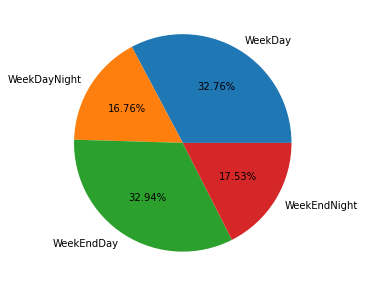

In [27]:
plt.figure(figsize=(10,5))
plt.pie(val,labels=index,autopct="%1.2f%%")
plt.show()

# Q10. Plot violin plot between above respective 13 categories of unique year month combinationsMonth_Year ( 1_2019 , 2_2019 …. 1_2020) along side the number of orders being placed. Write down the inferences according to the graph. 

In [28]:
d_f=pd.DataFrame(df.groupby(["year","month"])["quantity"].sum()).reset_index()

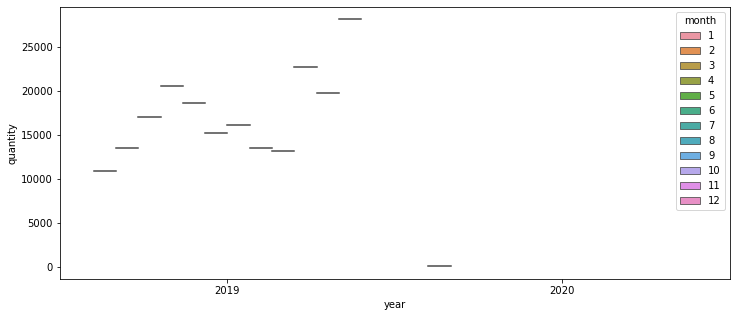

In [29]:
plt.figure(figsize=(12,5))
sns.violinplot(data=d_f,x="year",y="quantity",hue="month")
plt.show()

<AxesSubplot:xlabel='year', ylabel='quantity'>

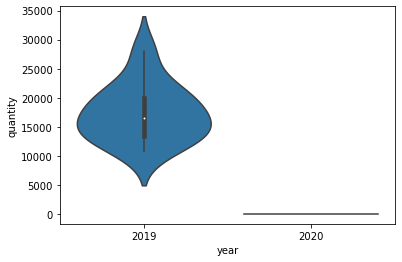

In [30]:
sns.violinplot(data=d_f,x="year",y="quantity")

Infrences:
From both graphs above.
1. The Median value for order quantity is between 15,000 to 20,000 approx 17,500(rough figure).
2. Less Number of orders are placed in january 2020 comparing to january 2019 maybe because of covid.
3. The upper outlier for the year 2019 has a higher value.
4. Larger Value of IQR and existence of a bigger outlier may be due to the order placed in month of December 2019.
5. The Order's Show a nearly same trend during june and july and also during september and october

In [31]:
d_f.median()

year         2019.0
month           6.0
quantity    16072.0
dtype: float64